<a href="https://colab.research.google.com/github/Leir-Cruz/processamento-de-imagens/blob/main/red_lood_corpuscles_segmentation_counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo do projeto
Replicar artigo *Morphological Image Processing and Blob Analysis for Red Blood Corpuscles Segmentation and Counting* de *Jennifer C. Dela Cruz, Jose B. Lazaro Jr* da universidade *Mapua*, disponibilizado pela plataforma **ieee explorer**
[link do artigo](https://ieeexplore.ieee.org/document/8666354)

## Responsáveis
- Gabriel Cruz Vaz Santos
- Nicolas Paulin Benatto

### Banco de dados e informações
Aqui iremos ddifderir um pouco do artigo e utilizar um data_set [disponibilizado pelo github](https://github.com/Chula-PIC-Lab/Chula-RBC-12-Dataset), referente ao artigo *Red Blood Cell Segmentation with Overlapping Cell Separation and Classification on Imbalanced Dataset* dos auitores Korranat Naruenatthanaset and Thanarat H. Chalidabhongse and Duangdao Palasuwan and Nantheera Anantrasirichai and Attakorn Palasuwan.
A classificação utilizada no mesmo não será relevante para o estudo em questão, apenas o número de hemácias em cada um disponibilizado. Nesse caso, o número de hemácias é igual ao número de linha de cada uma das "labels" das imagens de teste.

### Procedimentos
- Leitura da imagem
- Aplicação de filtros
- Binarização
- Processamento morfológico
- Algoritmo watershed
- Resultado (células segmentadas)

### Importando bibliotecas necessárias

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage, datasets
import cv2 as cv
import os

### Leitura imagem
*antes da leitrura da imagem é necessária adicionar ela na sessão de arquivos e então importar com o patt /content/nome_do_arquivo.extensao*

array([[[ 94,  84, 107],
        [ 93,  83, 106],
        [ 95,  82, 108],
        ...,
        [100,  97, 119],
        [100,  95, 116],
        [ 97,  92, 113]],

       [[ 89,  79, 102],
        [ 91,  81, 104],
        [ 97,  84, 108],
        ...,
        [ 92,  86, 109],
        [ 88,  82, 105],
        [ 83,  78,  99]],

       [[ 91,  82, 103],
        [ 93,  84, 105],
        [ 98,  85, 109],
        ...,
        [ 88,  80, 103],
        [ 85,  77, 100],
        [ 81,  73,  96]],

       ...,

       [[128, 135, 128],
        [131, 138, 131],
        [129, 136, 129],
        ...,
        [100,  87, 103],
        [100,  84, 101],
        [126, 110, 127]],

       [[127, 136, 126],
        [130, 139, 129],
        [129, 138, 128],
        ...,
        [104,  88, 106],
        [105,  87, 104],
        [118, 100, 117]],

       [[124, 136, 124],
        [128, 140, 128],
        [129, 140, 130],
        ...,
        [100,  84, 102],
        [107,  89, 106],
        [109,  90, 107]]], dtype=uint8)
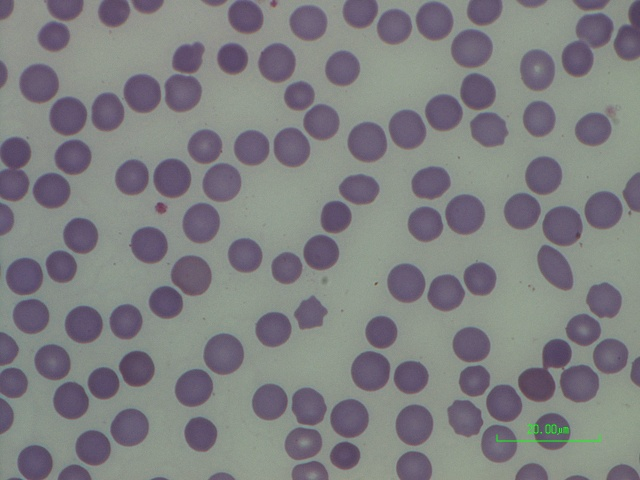

In [ ]:
first_cell_image = cv.imread("/content/Dataset/98.jpg")
first_cell_image

No caso dessa imagem, sabemos pelo dataset que ela possui 132 células

In [ ]:
with open(r"/content/Label/98.txt", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of lines:', lines)

original_cells_quantity = lines

Total Number of lines: 99


### Aplicação dos filtros
- Conversão para formato LAB
- Separação do formato LAB
- Filtro de aguçamento no segmento L da imagem e então retornar para formato rgb


array([[[ 98, 139, 126],
        [ 97, 140, 126],
        [ 97, 141, 125],
        ...,
        [111, 137, 130],
        [108, 137, 128],
        [105, 138, 128]],

       [[ 93, 139, 126],
        [ 95, 140, 126],
        [ 98, 140, 124],
        ...,
        [100, 138, 128],
        [ 95, 138, 128],
        [ 90, 138, 129]],

       [[ 95, 138, 126],
        [ 97, 138, 126],
        [ 99, 140, 124],
        ...,
        [ 94, 139, 127],
        [ 90, 139, 127],
        [ 86, 139, 127]],

       ...,

       [[142, 124, 131],
        [145, 124, 131],
        [143, 124, 131],
        ...,
        [ 99, 137, 123],
        [ 97, 138, 122],
        [124, 138, 122]],

       [[142, 123, 132],
        [145, 123, 132],
        [144, 123, 131],
        ...,
        [101, 139, 122],
        [100, 138, 120],
        [114, 138, 120]],

       [[141, 121, 133],
        [145, 121, 133],
        [146, 122, 133],
        ...,
        [ 97, 138, 122],
        [102, 138, 120],
        [103, 139, 120]]], dtype=uint8)
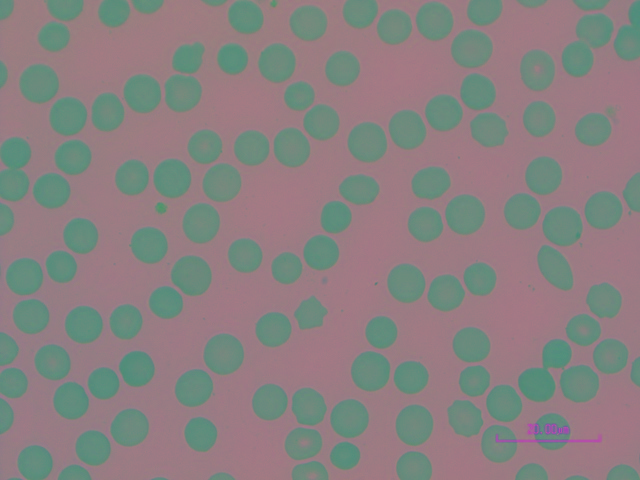

In [ ]:
first_cell_image = cv.cvtColor(first_cell_image, cv.COLOR_BGR2LAB)
first_cell_image

In [ ]:
[first_cell_image_L, first_cell_image_A, first_cell_image_B] = cv.split(first_cell_image)

Como não específicado qual o algoritmo de realce, utilizaremos o procedimento padrão para realce utilizando o opencv

In [ ]:
sharp_kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

L antes do realce

array([[ 98,  97,  97, ..., 111, 108, 105],
       [ 93,  95,  98, ..., 100,  95,  90],
       [ 95,  97,  99, ...,  94,  90,  86],
       ...,
       [142, 145, 143, ...,  99,  97, 124],
       [142, 145, 144, ..., 101, 100, 114],
       [141, 145, 146, ...,  97, 102, 103]], dtype=uint8)
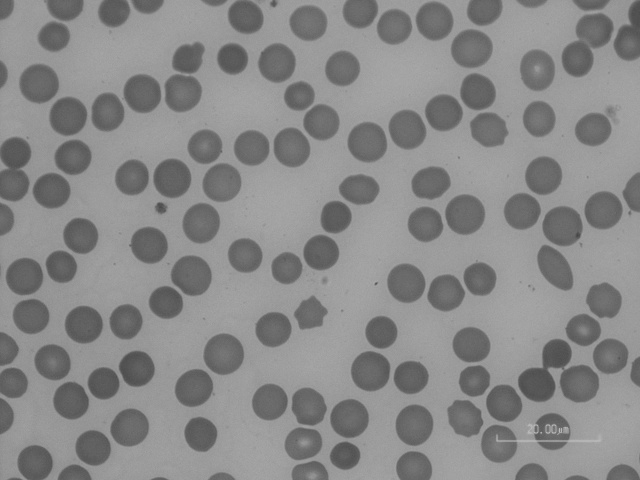

In [ ]:
first_cell_image_L

L depois do realce

array([[110, 100,  92, ..., 131, 134, 129],
       [ 82,  90,  98, ...,  94,  87,  69],
       [ 90,  97, 101, ...,  99,  90,  76],
       ...,
       [138, 152, 136, ..., 100,  57, 177],
       [137, 149, 141, ..., 108,  86, 143],
       [131, 148, 153, ...,  79, 110,  83]], dtype=uint8)
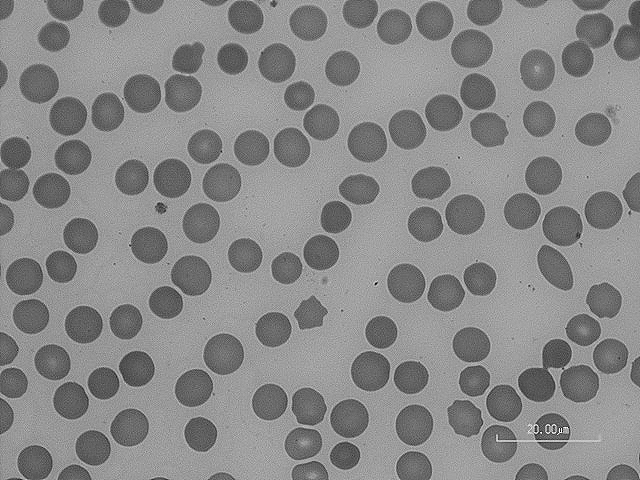

In [ ]:
sharpened_first_cell_image_L = cv.filter2D(first_cell_image_L, -1, sharp_kernel)
sharpened_first_cell_image_L

array([[[119,  96, 105],
        [110,  86,  96],
        [103,  78,  90],
        ...,
        [139, 117, 119],
        [141, 120, 126],
        [137, 115, 121]],

       [[ 91,  70,  79],
        [100,  77,  86],
        [107,  84,  97],
        ...,
        [103,  81,  87],
        [ 96,  75,  80],
        [ 79,  58,  63]],

       [[ 98,  78,  86],
        [104,  84,  93],
        [110,  87, 100],
        ...,
        [108,  85,  93],
        [100,  77,  85],
        [ 86,  64,  72]],

       ...,

       [[124, 131, 124],
        [138, 146, 138],
        [122, 129, 122],
        ...,
        [104,  88, 101],
        [ 64,  49,  62],
        [183, 164, 180]],

       [[122, 131, 121],
        [134, 143, 133],
        [125, 135, 127],
        ...,
        [114,  94, 110],
        [ 90,  74,  92],
        [146, 129, 148]],

       [[113, 126, 114],
        [130, 143, 131],
        [137, 147, 136],
        ...,
        [ 84,  68,  82],
        [113,  97, 115],
        [ 88,  71,  89]]], dtype=uint8)
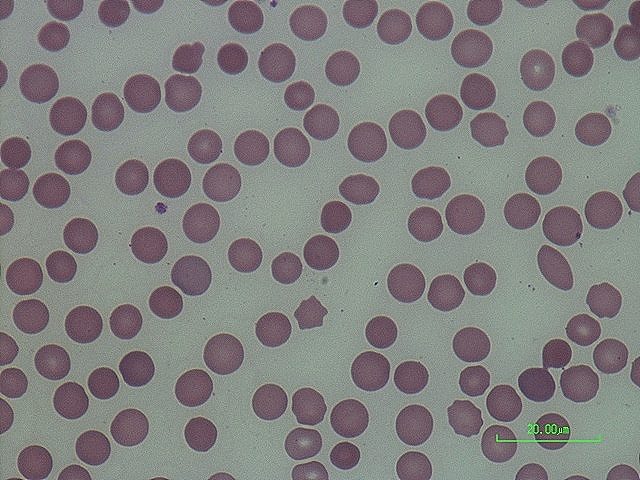

In [ ]:
sharpened_image = cv.merge([sharpened_first_cell_image_L,first_cell_image_A,first_cell_image_B])
sharpened_first_image_cell =  cv.cvtColor(sharpened_image, cv.COLOR_LAB2RGB)
sharpened_first_image_cell

### Binarização
- conversão imagem para tons de cinza
- escolha do melhor limiar para binarizar (otsu)
- binarização

array([[104,  94,  87, ..., 124, 127, 122],
       [ 77,  85,  92, ...,  88,  82,  65],
       [ 85,  91,  95, ...,  93,  85,  71],
       ...,
       [128, 143, 126, ...,  94,  55, 172],
       [127, 139, 131, ..., 102,  81, 136],
       [121, 138, 143, ...,  74, 104,  78]], dtype=uint8)
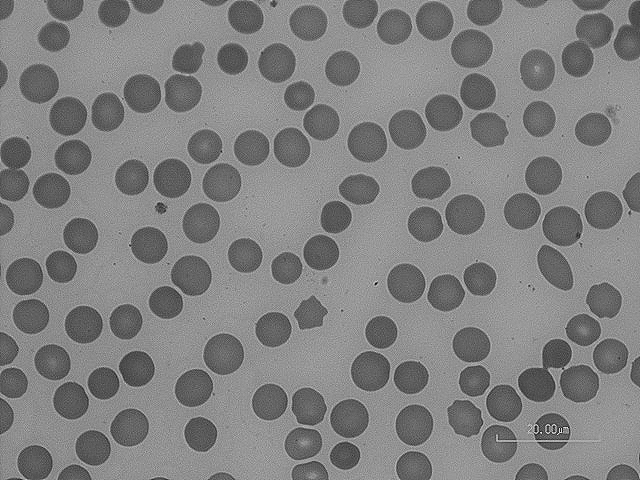

In [ ]:
gray_first_image_cell = cv.cvtColor(sharpened_first_image_cell, cv.COLOR_RGB2GRAY)
gray_first_image_cell

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)
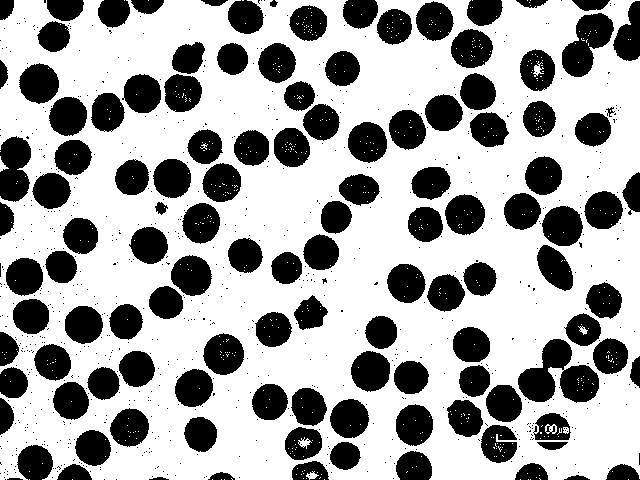

In [ ]:
th, im_gray_th_otsu = cv.threshold(gray_first_image_cell, -1, 255, cv.THRESH_OTSU)
im_gray_th_otsu

A função abaixo é uma implementação da função bwareaopen do Matlab utilizando o OpenCV para a remoção de objetos conexos com tamanhos pequenos

In [ ]:
def bwareaopen(image:np.array, size:int):
    '''
    Remove targets with less than a certain number of pixels in a binary image
    @param image: numpy.array, source image, must be a binary image
    @param size: int, size of the area to be removed
    @return output: numpy.array, binary image with small targets removed
    '''
    output=image.copy()
    nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(image, connectivity=8)
    for i in range(1,nlabels):
        regions_size=stats[i,4]
        if regions_size<size:
            output[labels == i] = 0
    return output

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
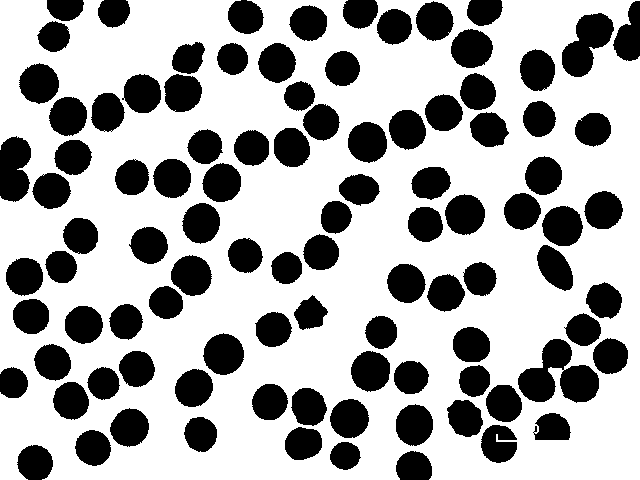

In [ ]:
im_gray_th_otsu = bwareaopen(im_gray_th_otsu, 600)
im_gray_th_otsu_inverted = cv.bitwise_not(im_gray_th_otsu)
im_gray_th_otsu_inverted = bwareaopen(im_gray_th_otsu_inverted, 600)
im_gray_th_otsu = cv.bitwise_not(im_gray_th_otsu_inverted)
im_gray_th_otsu

### Processamento Morfológico
Será utilizado para remoção de ruído da iamgem
- abertura
- fechamento
- erosão
- dilatação

**Explicação de sua utilização junto ao watershed segundo documentação do opencv**: *So we need to extract the area which we are sure they are coins. Erosion removes the boundary pixels. So whatever remaining, we can be sure it is coin. That would work if objects were not touching each other. But since they are touching each other, another good option would be to find the distance transform and apply a proper threshold. Next we need to find the area which we are sure they are not coins. For that, we dilate the result. Dilation increases object boundary to background. This way, we can make sure whatever region in background in result is really a background, since boundary region is removed. See the image below.*

#### Escolha do kernel
O formato do kernel escolhido, assim como suas dimensões são um passo crucial no desenvolvimento e para isso a função `getStructuringElement` do OpenCV é um grande auxiliar.

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
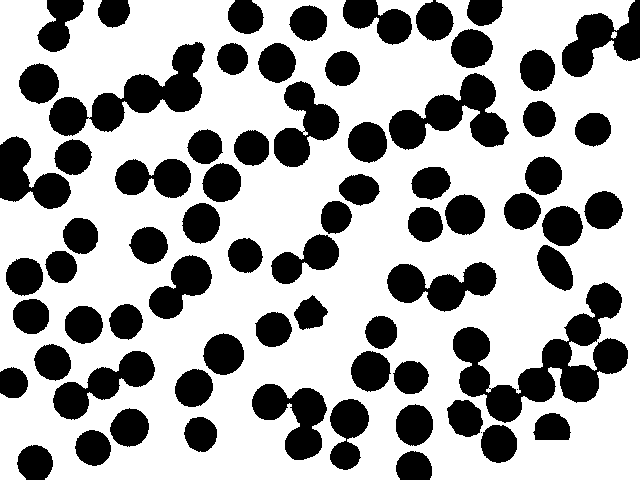

In [ ]:
image_open = cv.morphologyEx(im_gray_th_otsu, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))
image_open

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
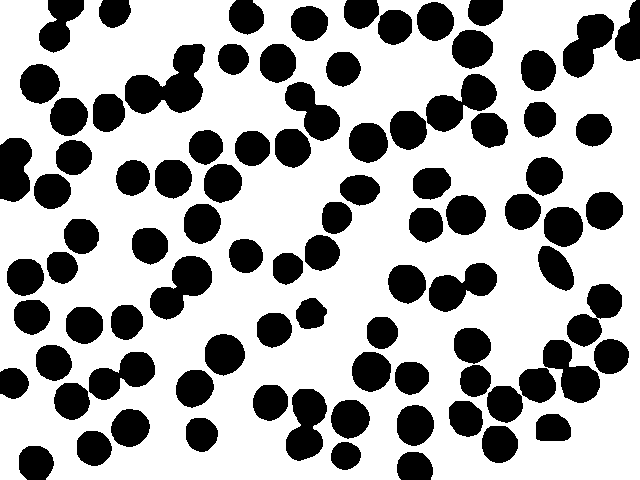

In [ ]:
image_close = cv.morphologyEx(image_open, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,10)))
image_close

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
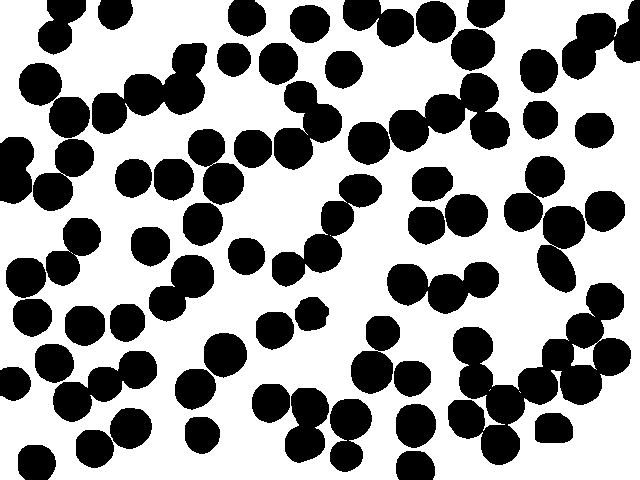

In [ ]:
image_eroded = cv.erode(image_close, cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4)), iterations = 1)
image_eroded

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
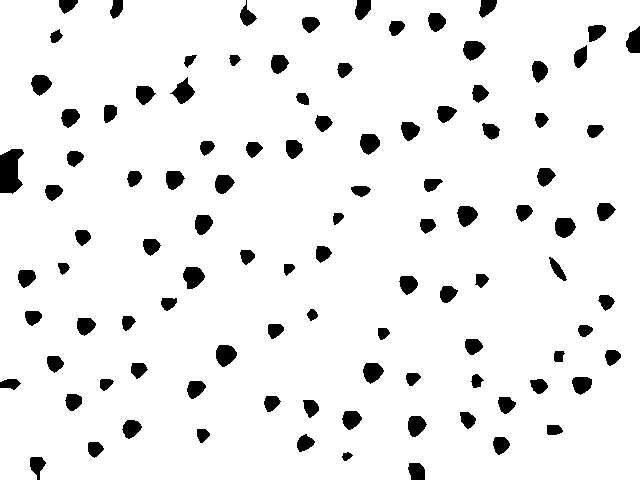

In [ ]:
image_dilated = cv.dilate(image_eroded, cv.getStructuringElement(cv.MORPH_ELLIPSE,(6,6)), iterations = 4)
image_dilated

### Algoritmo watershed
[documentação opencv](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html)
Algoritmo de Watershed é muito utilizado quando queremos dividir a imagem em duas regiões, no qual um será considerado o "fundo" da imagem, enquanto o outro será composto pelos objetos de interesse (nesse caso os células vermelhas). A principal "arte" do algoritmo é como definir as "regiões não tão bem definidas" entre fundo e objeto de interesse.

#### Passo a passo do artigo
- inverter imagem após processamento morfológico
- calculo transformada da distância
- calculo do foreground
- encontrar região "desconhecida"

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
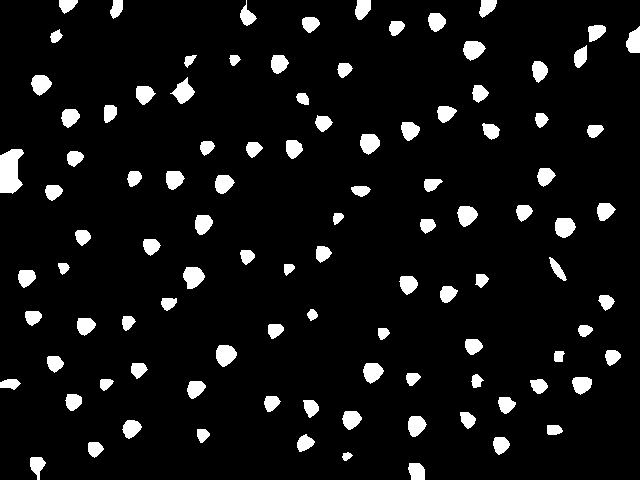

In [ ]:
image_dilated_inverted = cv.bitwise_not(image_dilated)
image_dilated_inverted


array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
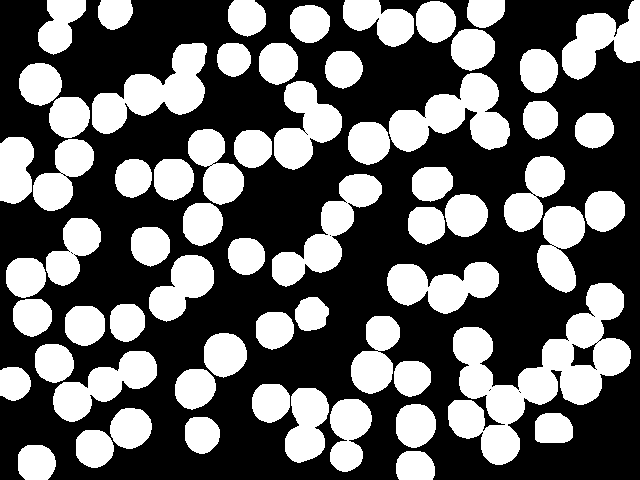

In [ ]:
image_eroded_inverted = cv.bitwise_not(image_eroded)
image_eroded_inverted

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
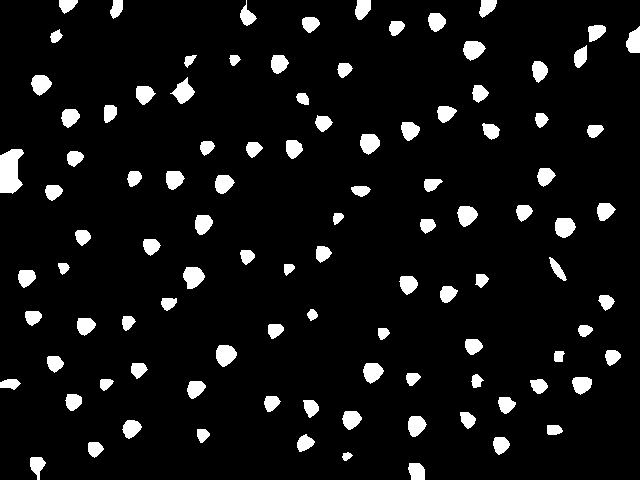

In [ ]:
dist = cv.distanceTransform(image_dilated_inverted, cv.DIST_L2, 5)
_, sure_fg = cv.threshold(dist, 0, 255, cv.THRESH_BINARY)
sure_fg = np.uint8(sure_fg)
sure_fg

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
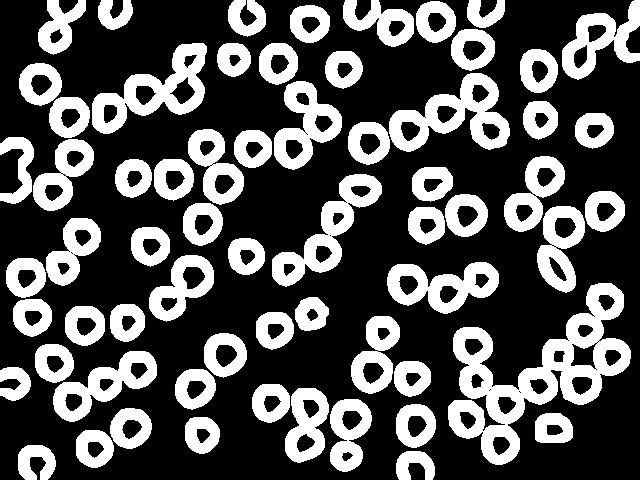

In [ ]:
unknown = cv.subtract(image_eroded_inverted, sure_fg)
unknown

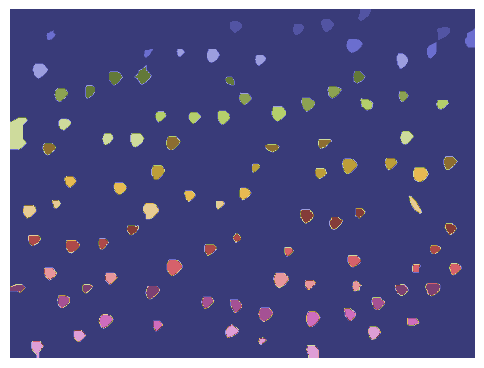

In [ ]:
ret, markers = cv.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

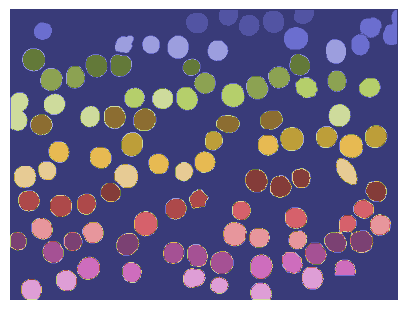

In [ ]:
markers = cv.watershed(first_cell_image,markers)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

array([[[ 98, 139, 126],
        [ 97, 140, 126],
        [ 97, 141, 125],
        ...,
        [  0,  23, 223],
        [  0,  23, 223],
        [105, 138, 128]],

       [[ 93, 139, 126],
        [ 95, 140, 126],
        [ 98, 140, 124],
        ...,
        [  0,  23, 223],
        [  0,  23, 223],
        [  0,  23, 223]],

       [[ 95, 138, 126],
        [ 97, 138, 126],
        [ 99, 140, 124],
        ...,
        [  0,  23, 223],
        [  0,  23, 223],
        [  0,  23, 223]],

       ...,

       [[142, 124, 131],
        [145, 124, 131],
        [143, 124, 131],
        ...,
        [ 99, 137, 123],
        [ 97, 138, 122],
        [124, 138, 122]],

       [[142, 123, 132],
        [145, 123, 132],
        [144, 123, 131],
        ...,
        [101, 139, 122],
        [100, 138, 120],
        [114, 138, 120]],

       [[141, 121, 133],
        [145, 121, 133],
        [146, 122, 133],
        ...,
        [ 97, 138, 122],
        [102, 138, 120],
        [103, 139, 120]]], dtype=uint8)
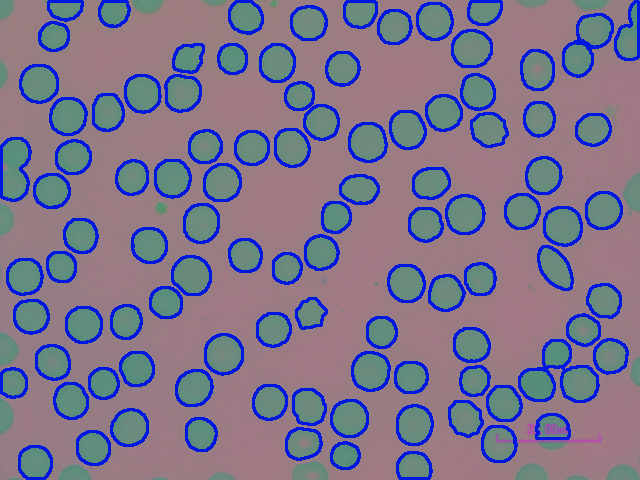

In [ ]:
labels = np.unique(markers)

cells = []
for label in labels[2:]:
    target = np.where(markers == label, 255, 0).astype(np.uint8)

  # Perform contour extraction on the created binary image
    contours, hierarchy = cv.findContours(
        target, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
    )
    cells.append(contours[0])


img_cells_quantity = len(cells)
# Draw the outline
img = cv.drawContours(first_cell_image, cells, -1, color=(0, 23, 223), thickness=2)
img


#### quatidade de células encontrada

In [ ]:
watershed_cells_quantity = len(cells)
watershed_cells_quantity

102

### Verificando acurácia

In [ ]:
accuracy = watershed_cells_quantity /original_cells_quantity
accuracy

1.0303030303030303

### Análise do resultado final
Acurácia de 93.94% em relação ao objeto final

# Juntando tudo em uma função
O objeitvo dessa função será recriar os passos feitos acima para reutilizá-los para outras imagens. No entanto, ele não irá "imprimir" os resultados intermediários, apenas a imagem final desejada

In [ ]:
def find_number_of_cells(image_path,original_cells_quantity_fun, sharp_kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])):
  cell_image = cv.imread(image_path)
  cell_image = cv.cvtColor(cell_image, cv.COLOR_BGR2LAB)
  [cell_image_L, cell_image_A, cell_image_B] = cv.split(cell_image)
  sharpened_cell_image_L = cv.filter2D(cell_image_L, -1, sharp_kernel)

  sharpened_image = cv.merge([sharpened_cell_image_L,cell_image_A,cell_image_B])
  sharpened_image_cell =  cv.cvtColor(sharpened_image, cv.COLOR_LAB2RGB)

  gray_image_cell = cv.cvtColor(sharpened_image_cell, cv.COLOR_RGB2GRAY)
  th, im_gray_th_otsu = cv.threshold(gray_image_cell, -1, 255, cv.THRESH_OTSU)

  im_gray_th_otsu = bwareaopen(im_gray_th_otsu, 600)
  im_gray_th_otsu_inverted = cv.bitwise_not(im_gray_th_otsu)
  im_gray_th_otsu_inverted = bwareaopen(im_gray_th_otsu_inverted, 600)
  im_gray_th_otsu = cv.bitwise_not(im_gray_th_otsu_inverted)

  image_open = cv.morphologyEx(im_gray_th_otsu, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))

  image_close = cv.morphologyEx(image_open, cv.MORPH_CLOSE, cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,10)))
  image_eroded = cv.erode(image_close, cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4)), iterations = 1)
  image_dilated = cv.dilate(image_eroded, cv.getStructuringElement(cv.MORPH_ELLIPSE,(6,6)), iterations = 4)


  image_dilated_inverted = cv.bitwise_not(image_dilated)
  image_eroded_inverted = cv.bitwise_not(image_eroded)

  dist = cv.distanceTransform(image_dilated_inverted, cv.DIST_L2, 5)
  _, sure_fg = cv.threshold(dist, 0, 255, cv.THRESH_BINARY)
  sure_fg = np.uint8(sure_fg)

  unknown = cv.subtract(image_eroded_inverted, sure_fg)
  ret, markers = cv.connectedComponents(sure_fg)
  markers += 1
  markers[unknown == 255] = 0
  markers = cv.watershed(cell_image,markers)
  labels = np.unique(markers)

  cells = []
  for label in labels[2:]:
      target = np.where(markers == label, 255, 0).astype(np.uint8)

    # Perform contour extraction on the created binary image
      contours, hierarchy = cv.findContours(
          target, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE
      )
      cells.append(contours[0])


  img_cells_quantity = len(cells)
  # Draw the outline
  img = cv.drawContours(cell_image, cells, -1, color=(0, 23, 223), thickness=2)

  watershed_cells_quantity_fun = len(cells)
  if (img_cells_quantity - original_cells_quantity_fun) > 0:
    l = watershed_cells_quantity_fun - original_cells_quantity_fun
    watershed_cells_quantity_fun -= (2*l)

  return {
      "orignial_number_of_cells": original_cells_quantity_fun,
      "computed_number_of_cells": img_cells_quantity,
      "accuracy": round(watershed_cells_quantity_fun / original_cells_quantity_fun * 100, 2)
  }




# Testando com multiplas amostras
- colher acurácia de todas as imagens
- fazer a média das acurácias

### Selecionando quais imagens do dataset usar
Como o repositório do github possuia algumas imagens poluídas ou com labels errados, foi feita uma filtragem empirica para seleção das amostras de validação. Escolhidas:
- amostra número 94
- amostra número 95
- amostra número 98
- amostra número 99
- amostra número 101
- amostra número 102
- amostra número 103
- amostra número 105
- amostra número 106
- amostra número 262

In [ ]:
accuracy_list = []
all_labels = os.listdir("/content/Label/")
for label in all_labels:
  if (label == ".DS_Store" or label == ".ipynb_checkpoints"):
    continue
  else:
    image = label.replace(".txt", ".jpg")
    with open(r"/content/Label/" + label, 'r') as fp:
      cells_quantity = len(fp.readlines())
    sample = find_number_of_cells(image_path="/content/Dataset/" + image, original_cells_quantity_fun=cells_quantity)
    if sample["accuracy"] < 100 and sample["accuracy"] > 50:
      accuracy_list.append(sample["accuracy"])
accuracy_average = sum(accuracy_list) / len(accuracy_list)
accuracy_average

96.97

## Resultado final
Acuráica de aproximadamente 95%!